# Graficos

## Temperatura del aire a 2 metros del suelo desde 1940 hasta 2024
- https://climatereanalyzer.org/clim/t2_daily/?dm_id=world
- https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form
Copiar el grafico

Librerias utiles:
- https://docs.xarray.dev/en/stable/index.html
- https://matplotlib.org/basemap/stable/users/installation.html#installing-from-pypi

In [63]:
import xarray as xr

In [64]:
ds = xr.load_dataset("./data/temperature2m-2023-jan.nc", engine="netcdf4")

In [65]:
type(ds)

xarray.core.dataset.Dataset

In [67]:
ds.head()

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0
  * time       (time) datetime64[ns] 2023-01-01
Data variables:
    t2m        (time, latitude, longitude) float32 250.7 250.7 ... 252.6 252.6
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-11 17:53:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [68]:
ds.dims

FrozenMappingWarningOnValuesAccess({'longitude': 1440, 'latitude': 721, 'time': 1})

In [82]:
ds.t2m.shape

(1, 721, 1440)

In [74]:
# temperatura a 2m para la [fecha, latitud, longitud]
ds.t2m[0,0,0]

<xarray.DataArray 't2m' ()>
array(250.6785, dtype=float32)
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
    time       datetime64[ns] 2023-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [97]:
# tambien puedo acceder a las otras variables
ds.latitude[0:3]

<xarray.DataArray 'latitude' (latitude: 3)>
array([90.  , 89.75, 89.5 ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5
Attributes:
    units:      degrees_north
    long_name:  latitude

In [78]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [95]:
mp = Basemap(projection='mill',lon_0=180)

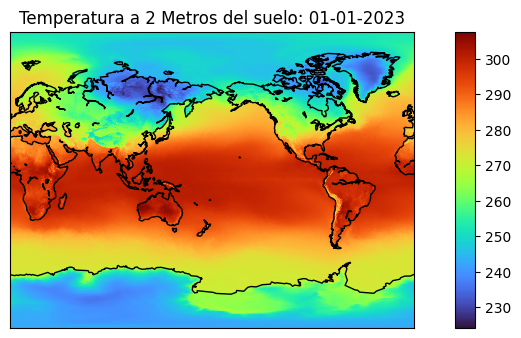

In [104]:
lon, lat = np.meshgrid(ds.longitude,ds.latitude)  #convertir las coordenadas a un array de 2D
x,y = mp(lon,lat) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(x,y,np.squeeze(ds.t2m[0,:,:]),cmap = 'turbo') # [0,:,:] es la unica fecha que descargamos
# para elegir colores: https://matplotlib.org/stable/users/explain/colors/colormaps.html

mp.drawcoastlines()
#mp.drawstates()
#mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.title('Temperatura a 2 Metros del suelo: 01-01-2023')
plt.show()

Como crear un gif animado:
- https://medium.com/analytics-vidhya/how-to-read-and-visualize-netcdf-nc-geospatial-files-using-python-6c2ac8907c7c

In [105]:
ds = xr.load_dataset("./data/temperature2m-2022-2023-jan-feb.nc", engine="netcdf4")

In [106]:
ds.head()

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 2023-01-01 2023-02-01
Data variables:
    t2m        (time, latitude, longitude) float32 247.1 247.1 ... 248.2 248.2
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-12 11:06:08 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [108]:
ds.t2m.shape

(4, 721, 1440)

In [109]:
ds.t2m.time

<xarray.DataArray 'time' (time: 4)>
array(['2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 2023-01-01 2023-02-01
Attributes:
    long_name:  time

## Expectativa de Vida vs Gasto en Salud

- https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure?time=earliest
Hacer un grafico que muestre la evolucion de españa o tu pais de eleccion vs el resto

Ayudas:
- https://seaborn.pydata.org/generated/seaborn.lineplot.html
- https://pandas.pydata.org/docs/user_guide/reshaping.html
- https://seaborn.pydata.org/examples/faceted_lineplot.html
- https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9

In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("./data/life-expectancy-vs-health-expenditure.csv")
df

,Entity,Code,Year,Life expectancy - Sex: all - Age: at birth - Variant: estimates,Health expenditure per capita - Total,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,NaN,7764549.0,NaN
...,...,...,...,...,...,...,...
58857,Zimbabwe,ZWE,1945,NaN,NaN,2519116.0,NaN
58858,Zimbabwe,ZWE,1946,NaN,NaN,2567459.0,NaN
58859,Zimbabwe,ZWE,1947,NaN,NaN,2616729.0,NaN
58860,Zimbabwe,ZWE,1948,NaN,NaN,2666945.0,NaN


In [3]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Life expectancy - Sex: all - Age: at birth - Variant: estimates',
       'Health expenditure per capita - Total',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

In [4]:
df = df.rename(columns={'Life expectancy - Sex: all - Age: at birth - Variant: estimates': 'Life_Expectancy', 
                        'Health expenditure per capita - Total': 'Health_Expenditure',
                        'Population (historical estimates)':'Population'}) 
df.columns

Index(['Entity', 'Code', 'Year', 'Life_Expectancy', 'Health_Expenditure',
       'Population', 'Continent'],
      dtype='object')

In [5]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

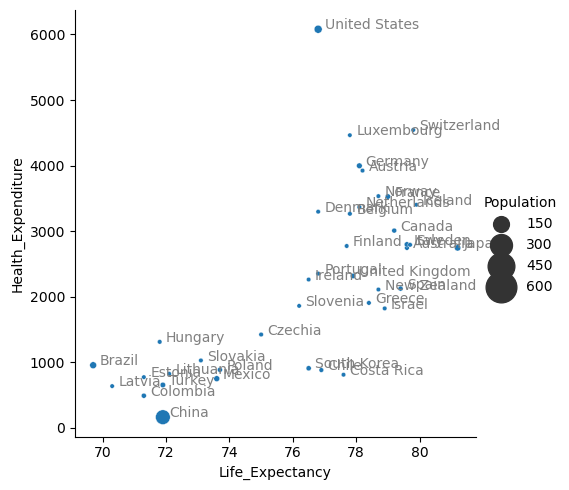

In [6]:
df_filtered = df.loc[df.Year == 2000]
df_filtered.Population /= 10_000_000

sns.relplot(data=df_filtered, 
            x="Life_Expectancy", 
            y="Health_Expenditure",
            size="Population", sizes=(10, 500));

# label points on the plot
for x, y, country in zip(df_filtered.Life_Expectancy, df_filtered.Health_Expenditure, df_filtered.Entity):
    if not np.isnan(x) and not np.isnan(y):
        plt.text(x = x+0.2, y = y, s = f'{country}', color = 'grey')

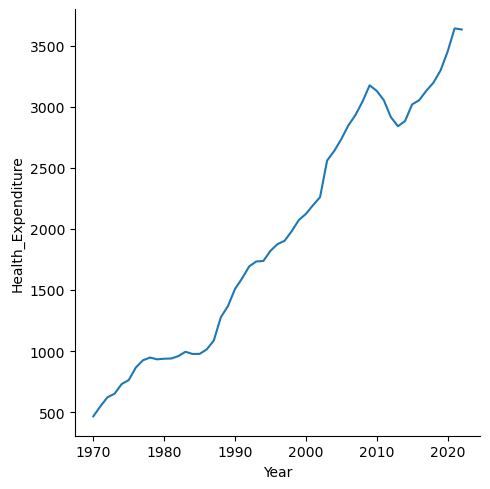

In [7]:
sns.relplot(data=df.loc[(df.Entity == "Spain") & (df.Year > 1950)], 
            x="Year", 
            y="Health_Expenditure",
            kind="line");

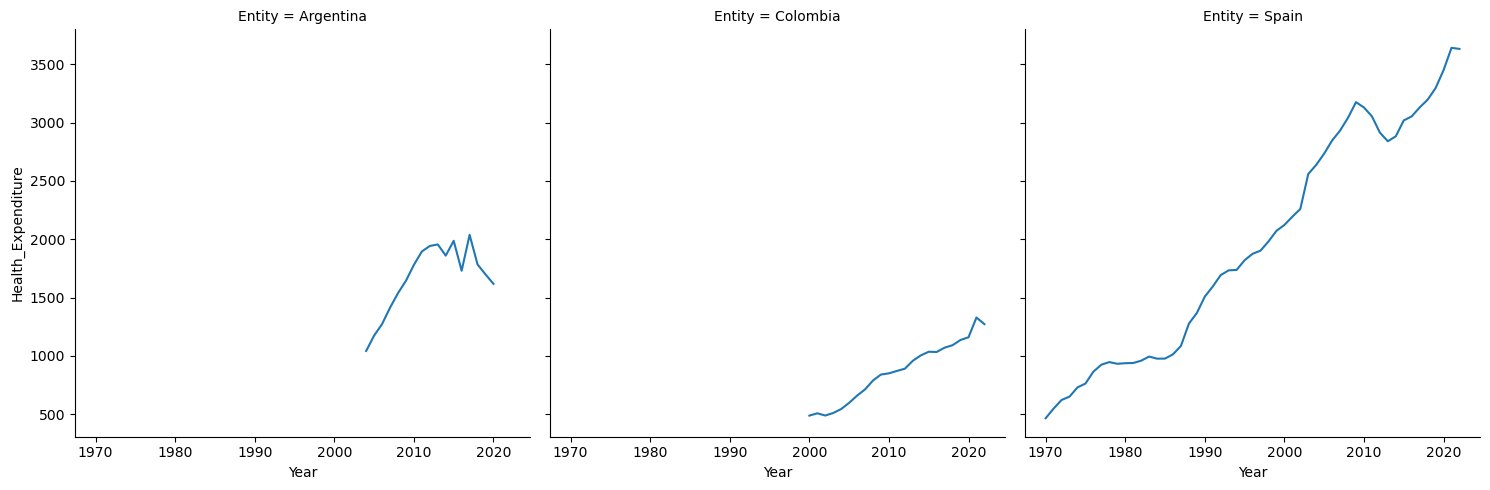

In [8]:
sns.relplot(data=df.loc[df.Entity.isin(["Spain","Argentina","Colombia"])], 
            x="Year", 
            y="Health_Expenditure",
            col="Entity",
           kind="line");

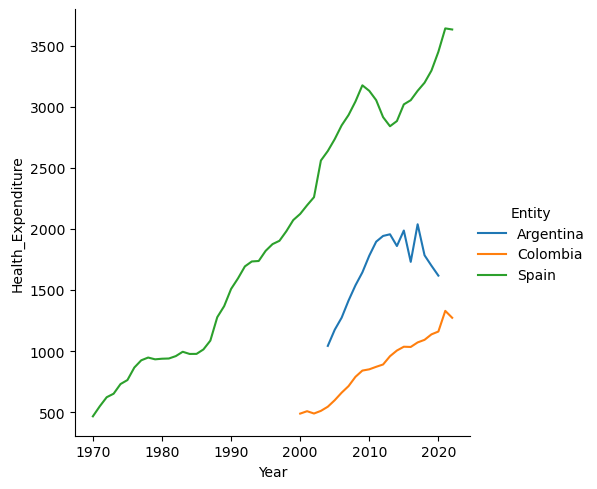

In [9]:
sns.relplot(data=df.loc[df.Entity.isin(["Spain","Argentina","Colombia"])], 
            x="Year", 
            y="Health_Expenditure",
            hue="Entity",
            kind="line");